In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Load in rPPG Data Sets and Merge

In [2]:
data_array = np.load('pulse.npy')
rppg = pd.DataFrame(data_array, columns = ['BVP'])

data_array = np.load('hrs.npy')
hrs = pd.DataFrame(data_array, columns = ['hrs'])

data_array = np.load('fft_spec.npy')
fft_spec = pd.DataFrame(data_array)

data_array = np.load('time.npy')
time = pd.DataFrame(data_array, columns = ['time'])
time = time.iloc[(len(time)-len(rppg)):]
time.reset_index(inplace=True)
time = time.drop(['index'], axis=1)

rppg = pd.concat([rppg, time], axis=1)

rppg['seconds'] = rppg['time'] - rppg['time'][0]

hrs = pd.concat([hrs, time], axis=1)
hrs['seconds'] = hrs['time'] - hrs['time'][0]
hrs['scaled'] = hrs['hrs'] - hrs['hrs'].min()

In [3]:
time

,time
0,1588351071.08287
1,1588351071.15704
2,1588351071.22418
3,1588351071.29904
4,1588351071.38268
5,1588351071.47867
6,1588351071.55585
7,1588351071.63100
8,1588351071.69925
9,1588351071.77278


In [4]:
rppg

,BVP,time,seconds
0,-0.23240,1588351071.08287,0.00000
1,-0.24937,1588351071.15704,0.07417
2,-0.20633,1588351071.22418,0.14131
3,0.49158,1588351071.29904,0.21617
4,0.86008,1588351071.38268,0.29981
5,1.00000,1588351071.47867,0.39580
6,0.99889,1588351071.55585,0.47298
7,0.51697,1588351071.63100,0.54813
8,0.26452,1588351071.69925,0.61638
9,-0.16099,1588351071.77278,0.68991


### Plot Raw rPPG Data

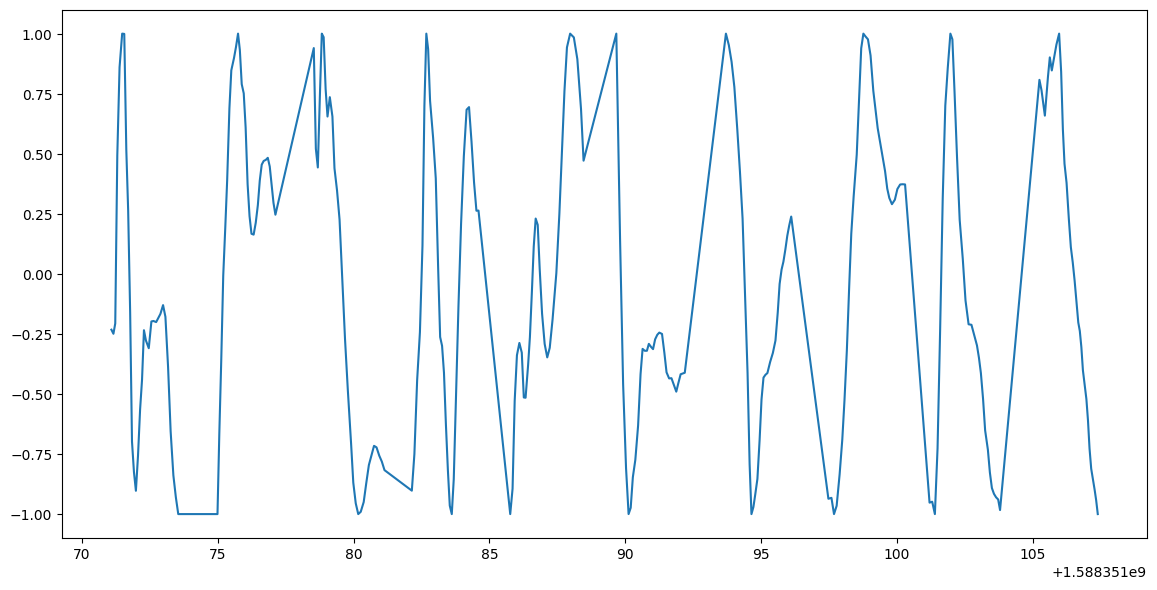

In [5]:
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(rppg['time'], rppg['BVP'])

### Plot rPPG Data on Seconds

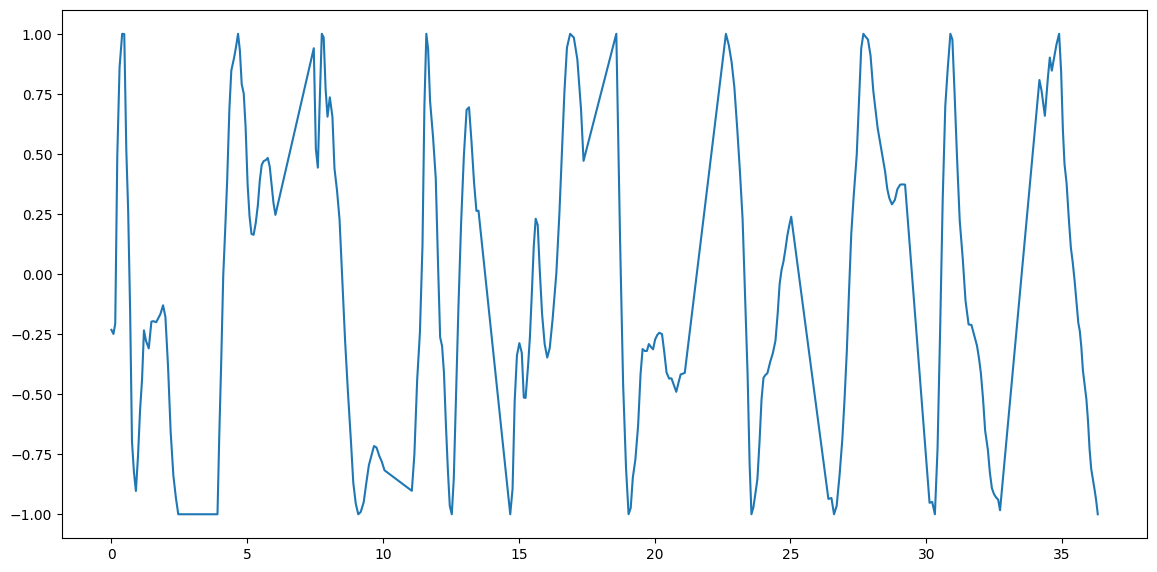

In [6]:
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(rppg['seconds'], rppg['BVP'])

### Find Peaks

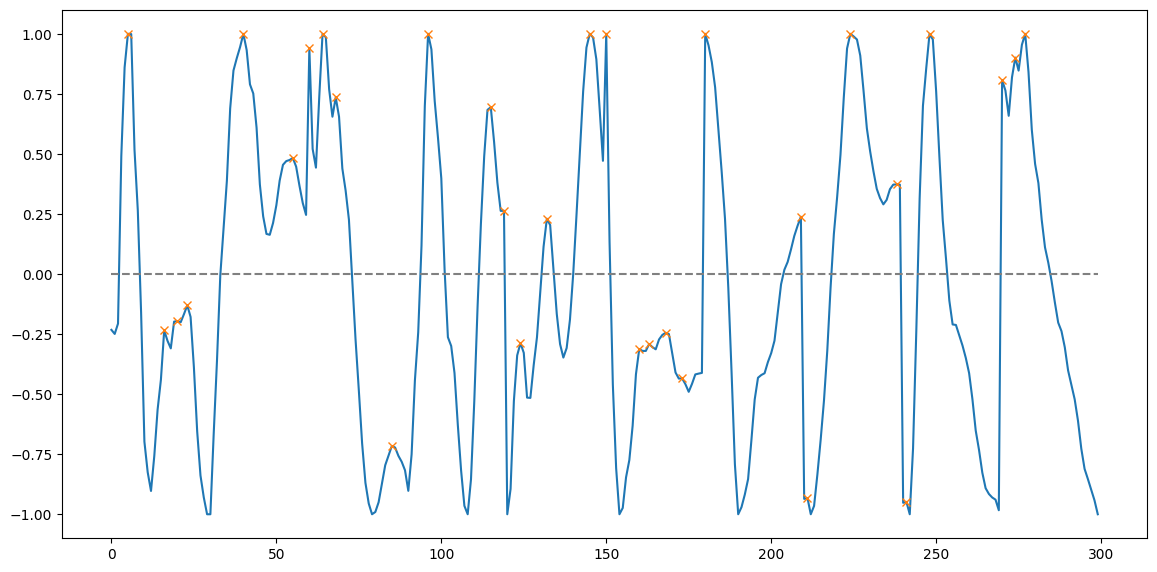

In [7]:
plt.figure(figsize=(14, 7), dpi=100)
x = rppg['BVP']
y = rppg['seconds']
peaks, _ = find_peaks(x, height=-1)
# , distance=12)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
sns.set(font_scale =1.5, style = 'ticks' )
plt.show()
# plt.xlim(0,3000)

### Create DataFrame of Peak Points, Find HRV, and Merge into Original rppg DataFrame

In [8]:
y = pd.DataFrame(_, columns=['peak_heights'])

rppg_peaks = pd.DataFrame(peaks, columns=['peak_points'])
rppg_peaks = rppg_peaks.merge(y, on=rppg_peaks.index)
rppg_peaks = rppg_peaks.drop(['key_0'], axis=1)

peaked = rppg_peaks.set_index('peak_points')
rppg = pd.concat([rppg, peaked], axis=1)
rppg_drop_na = rppg.dropna()
rppg_drop_na['diff'] = rppg_drop_na['seconds'].diff()
rppg_drop_na['norm_diff'] = (rppg_drop_na['diff'] - rppg_drop_na['diff'].min())/(rppg_drop_na['diff'].max()
                                                                                 - rppg_drop_na['diff'].min())
certain_columns=rppg_drop_na[['diff', 'norm_diff']]
certain_columns = pd.DataFrame(certain_columns)
rppg = pd.concat([rppg, certain_columns], axis=1)

/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Plot rPPG, Peak Points, and HRV

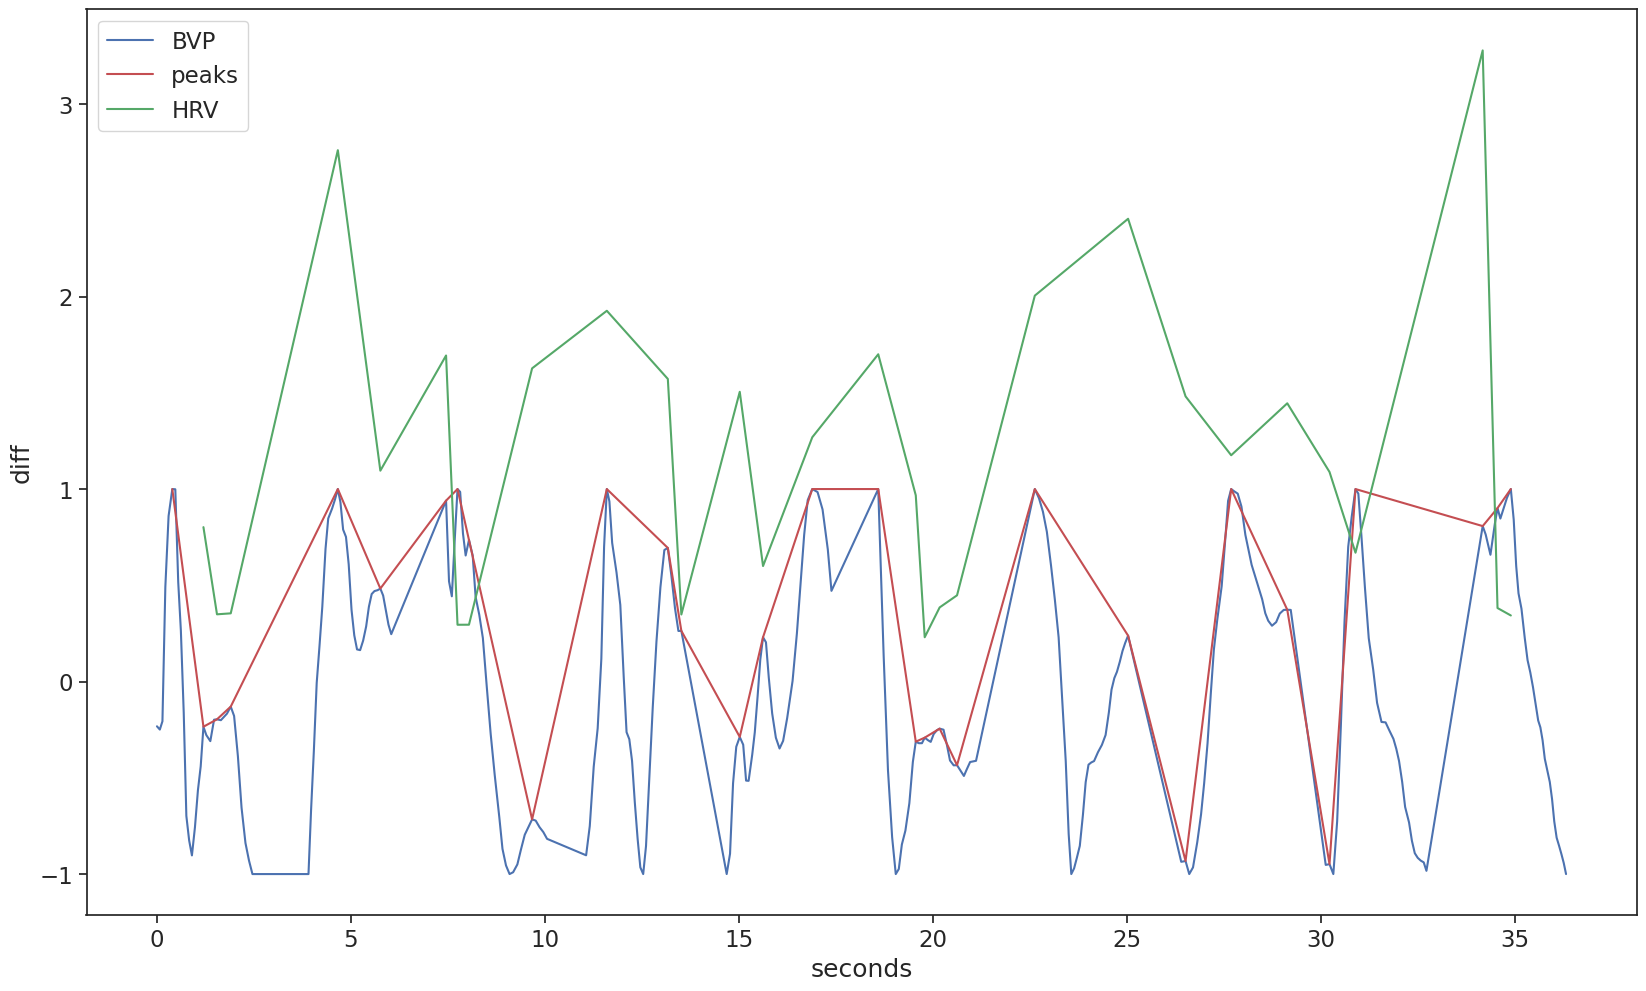

In [9]:
plt.figure(figsize=(20, 12), dpi=100)
sns.lineplot(rppg['seconds'], rppg['BVP'], label='BVP')
sns.lineplot(rppg['seconds'], rppg['peak_heights'], label='peaks', color='r')
sns.lineplot(rppg['seconds'], rppg['diff'], label='HRV', color='g')
# sns.lineplot(rppg['seconds'], rppg['norm_diff'], label='Normalized HRV', color='g')
# plt.plot(hrs['seconds'],hrs['scaled'])
plt.legend()
sns.set(font_scale =1.5, style = 'ticks' )

In [10]:
# plt.figure(figsize=(20, 12), dpi=100)
# sns.lineplot(data['seconds'], data['diff'], label='HRV', color='g')
# sns.lineplot(data['seconds'], data['diff_diff'], label='HRVV', color='y')

### Plot HRV

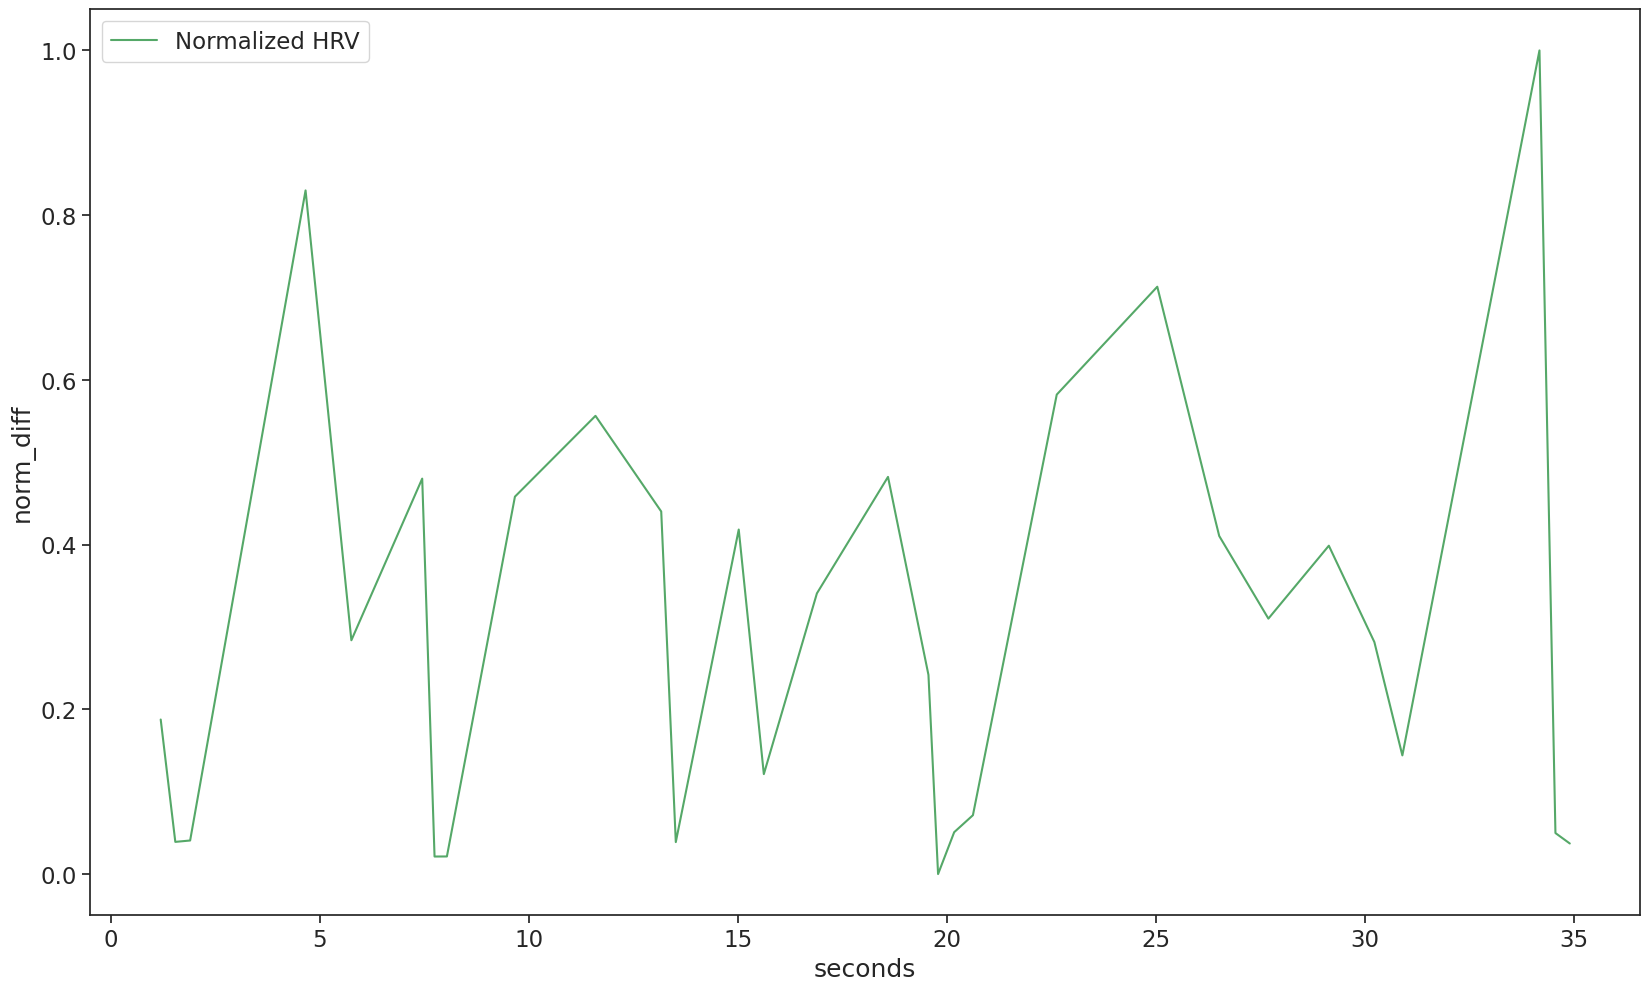

In [11]:
plt.figure(figsize=(20, 12), dpi=100)
sns.lineplot(rppg['seconds'], rppg['norm_diff'], label='Normalized HRV', color='g')
plt.legend()
sns.set(font_scale =1.5, style = 'ticks' )

## Root Mean Square of the Successive Differences (RMSSD)

The root mean square of successive differences between normal heartbeats (RMSSD) is obtained by first calculating each successive time difference between heartbeats in ms. Then, each of the values is squared and the result is averaged before the square root of the total is obtained. While the conventional minimum recording is 5 min, researchers have proposed ultra-short-term periods of 10 s, 30 s, and 60 s.

The RMSSD reflects the beat-to-beat variance in HR and is the primary time-domain measure used to estimate the vagally mediated changes reflected in HRV. The RMSSD is identical to the non-linear metric SD1, which reflects short-term HRV. Twenty-four-hour RMSSD measurements are strongly correlated with pNN50 and HF power. Minimum HR is more strongly correlated with LnSDANN than LnRMSSD (Ln means the natural logarithm). Maximum HR is weakly and inconsistently correlated with these time-domain measures.

While the RMSSD is correlated with HF power, the influence of respiration rate on this index is uncertain. The RMSSD is less affected by respiration than is RSA across several tasks. The RMSSD is more influenced by the PNS than SDNN. Lower RMSSD values are correlated with higher scores on a risk inventory of sudden unexplained death in epilepsy.

NN50, pNN50, and RMSSD are calculated using the differences between successive NN intervals. Since their computation depends on NN interval differences, they primarily index HF HR oscillations, are largely unaffected by trends in an extended time series, and are strongly correlated.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5624990/

In [12]:
rmssd = (sum((rppg_drop_na['diff']*1000)**2))**.5
rmssd

nan

In [13]:
nlrmssd = np.log(rmssd)
nlrmssd

nan

### Table 1 – Data from 10,308 Elite HRV users showing ln(rMSSD) and Elite HRV Score presented by age range and gender.

Source: https://elitehrv.com/normal-heart-rate-variability-age-gender

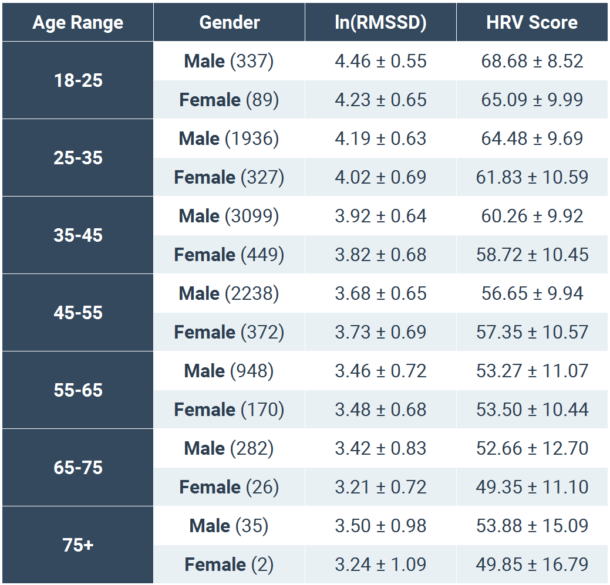

In [14]:
from IPython.display import Image
Image('/home/steven/Downloads/EliteHRV-AgeGender-610x585.png')

### Table 2 – Data gathered on Elite HRV platform shows rMSSD, ln(rMSSD), and “HRV Scores” for Elite HRV and is calculated for other HRV software applications based on published calculations. The data does  not necessarily represent the user populations for the other HRV platforms.

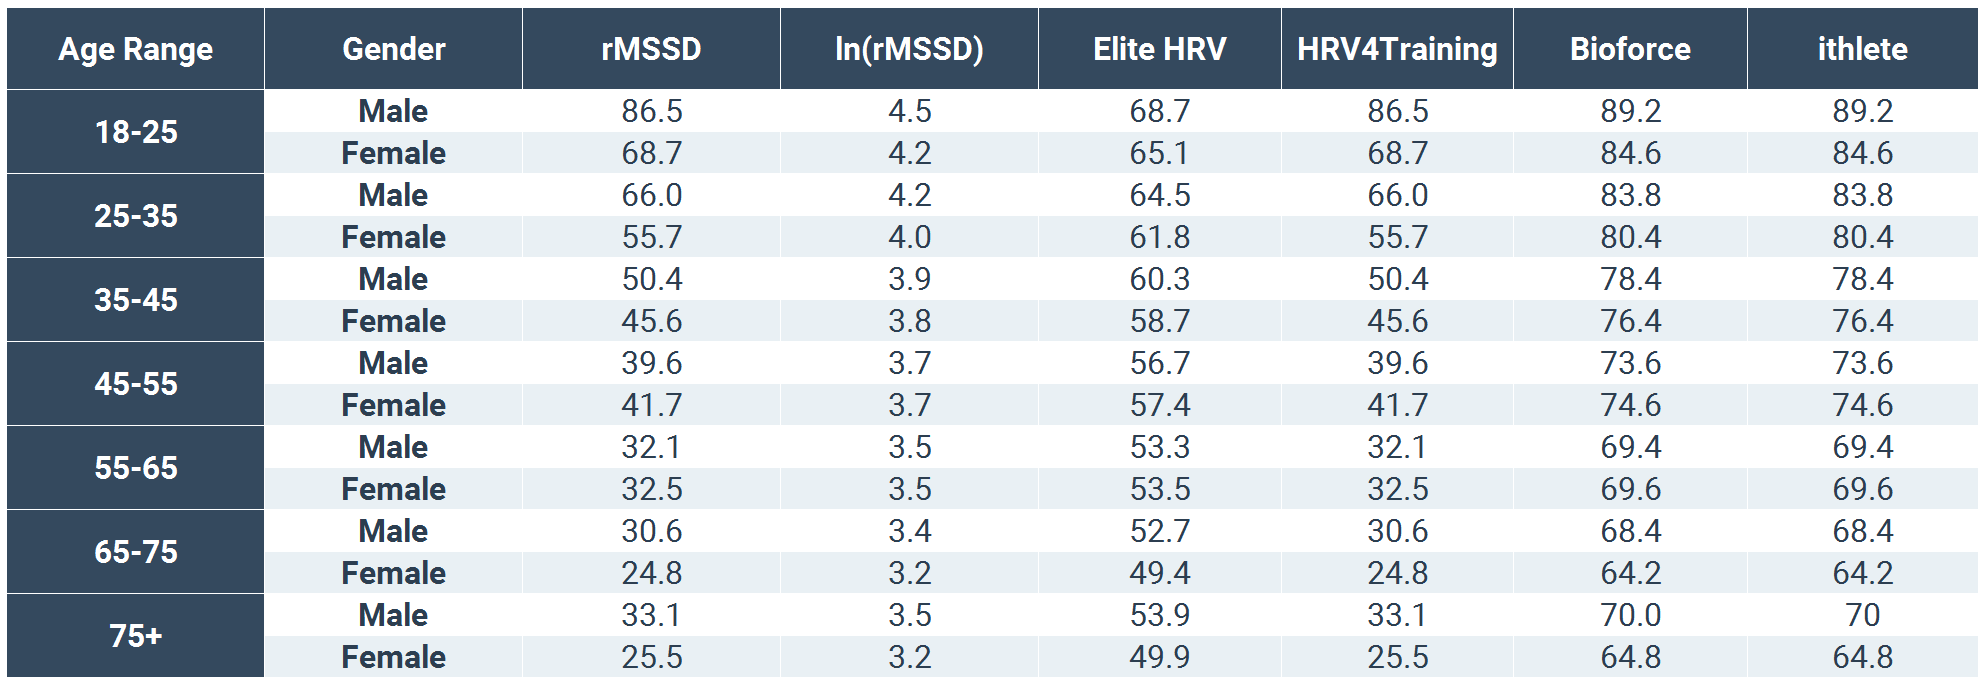

In [15]:
from IPython.display import Image
Image('/home/steven/Downloads/HRVPlatformsComparison.png')

### Plot HR

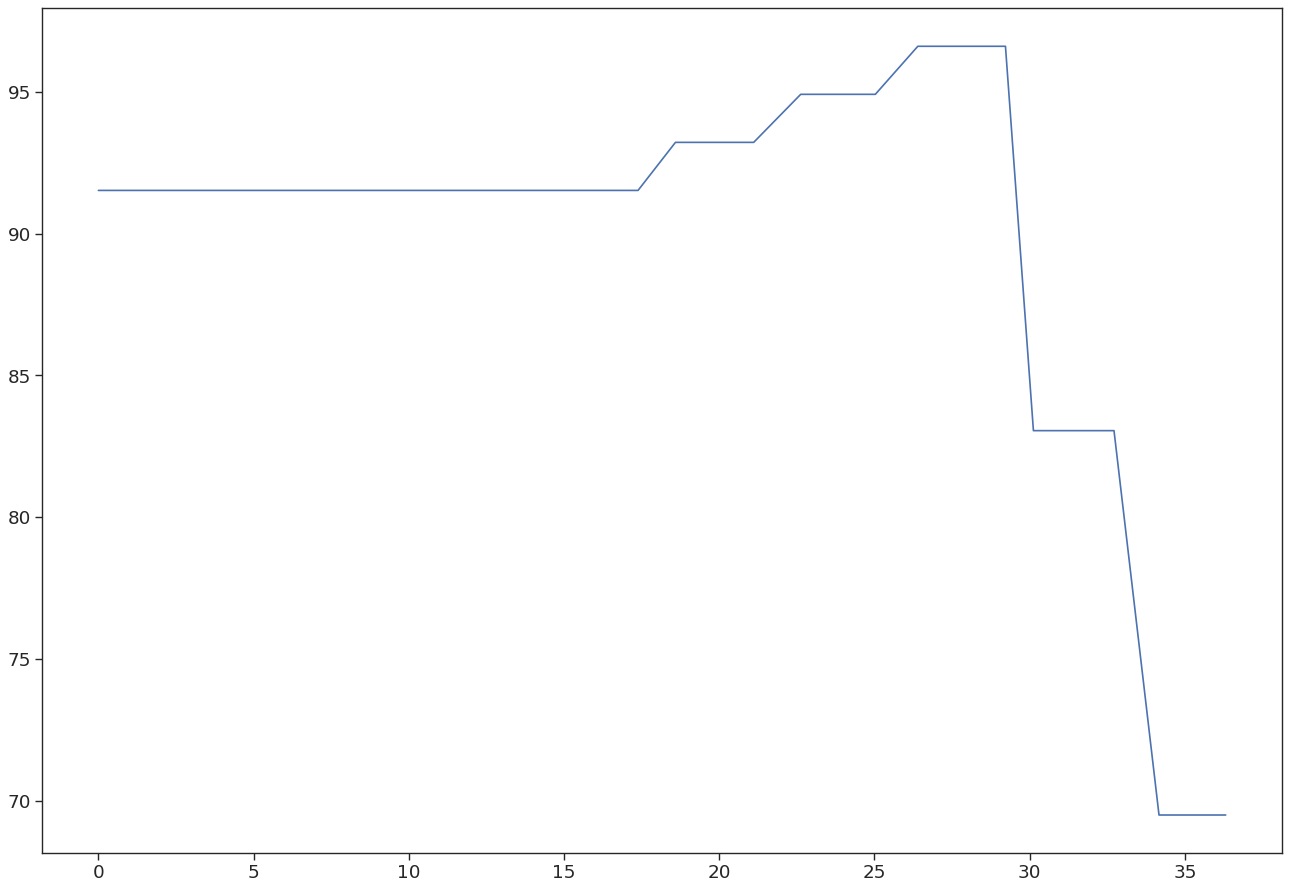

In [16]:
plt.figure(figsize=(20, 14), dpi=80)
plt.plot(hrs['seconds'],hrs['hrs'])
# plt.xlim(3000,10000)

### Perform RMSSD Calculations on rPPG

In [17]:
rppg_drop_na = rppg.dropna(subset=['diff'])
sample = rppg_drop_na['diff']
sample2 = rppg_drop_na['norm_diff']
import statistics 
print(f'HRV Variance rPPG ', statistics.variance(sample))
import statistics 
print(f'Normalized HRV Variance rPPG ', statistics.variance(sample2))
rmssd = (sum((rppg_drop_na['diff']*1000)**2))**.5
print(f'RMSSD rPPG ', rmssd)
nlrmssd = np.log(rmssd)
print(f'Natural Log RMSSD rPPG ', nlrmssd)

HRV Variance rPPG  0.6416598106663182
Normalized HRV Variance rPPG  0.06905299015929353
RMSSD rPPG  7634.004449386102
Natural Log RMSSD rPPG  8.94036781614311
